# Progetto IUM - Data Analysis
## Università di Informatica, Unito
Gruppo Federico Raso, Federico Verra

Questa sezione è dedicata a domande più generiche sui film

In [5]:
import pandas as pd
import geopandas as gpd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [72]:
data_directory = "../data/"
actors_df = pd.read_csv(data_directory+'actors.csv')
countries_df = pd.read_csv(data_directory+'countries.csv')
crew_df = pd.read_csv(data_directory+'crew.csv')
genres_df = pd.read_csv(data_directory+'genres.csv')
languages_df = pd.read_csv(data_directory+'languages.csv')
movies_df = pd.read_csv(data_directory+'movies.csv')
posters_df = pd.read_csv(data_directory+'posters.csv')
releases_df = pd.read_csv(data_directory+'releases.csv')
reviews_rotten_df = pd.read_csv(data_directory+'rotten_tomatoes_reviews.csv')
studios_df = pd.read_csv(data_directory+'studios.csv')
oscar_df = pd.read_csv(data_directory+'the_oscar_awards.csv')

world = gpd.read_file(data_directory+'/countries/ne_110m_admin_0_countries.shp')

## Analizzo e pulisco i dati

Movies_df

In [78]:
movies_int_df=movies_df.copy()
movies_int_df.dtypes

id               int64
name            object
date           float64
tagline         object
description     object
minute         float64
rating         float64
dtype: object

In [79]:
movies_df = movies_df[['id','name','date','minute','rating']]
movies_df['date'] = pd.to_datetime(movies_df['date'], errors='coerce', format='%Y').fillna(pd.to_datetime(movies_df['date'],errors='coerce'))

movies_df.rename(columns={'name':'film_name','date':'film_date'}, inplace=True)

movies_df

,id,film_name,film_date,minute,rating
0,1000001,Barbie,2023-01-01,114.0,3.86
1,1000002,Parasite,2019-01-01,133.0,4.56
2,1000003,Everything Everywhere All at Once,2022-01-01,140.0,4.30
3,1000004,Fight Club,1999-01-01,139.0,4.27
4,1000005,La La Land,2016-01-01,129.0,4.09
...,...,...,...,...,...
941592,1941593,神笛,NaT,NaN,NaN
941593,1941594,蟲極道蜜団子抗争編 壱ノ巻,NaT,30.0,NaN
941594,1941595,蟲極道蜜団子抗争編 弐ノ巻,NaT,30.0,NaN
941595,1941596,重生,NaT,NaN,NaN


In [9]:
duplicati = movies_df.duplicated()  
numero_duplicati = duplicati.sum() 
print(numero_duplicati)

0


Oscar_df

In [10]:
oscar_df.dtypes

year_film         int64
year_ceremony     int64
ceremony          int64
category         object
name             object
film             object
winner             bool
dtype: object

In [11]:
oscar_df = oscar_df[['year_film','year_ceremony','category','name','film','winner']].copy()

oscar_df['year_film'] = pd.to_datetime(oscar_df['year_film'], errors='coerce', format='%Y').fillna(pd.to_datetime(oscar_df['year_film'],errors='coerce'))
oscar_df['year_ceremony'] = pd.to_datetime(oscar_df['year_ceremony'], errors='coerce', format='%Y').fillna(pd.to_datetime(oscar_df['year_ceremony'],errors='coerce'))

oscar_df.rename(columns={'year_film':'film_date','year_ceremony':'ceremony_date', 'name':'person_country','film':'film_name'}, inplace=True)

oscar_df

,film_date,ceremony_date,category,person_country,film_name,winner
0,1927-01-01,1928-01-01,ACTOR,Richard Barthelmess,The Noose,False
1,1927-01-01,1928-01-01,ACTOR,Emil Jannings,The Last Command,True
2,1927-01-01,1928-01-01,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927-01-01,1928-01-01,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927-01-01,1928-01-01,ACTRESS,Gloria Swanson,Sadie Thompson,False
...,...,...,...,...,...,...
10884,2023-01-01,2024-01-01,WRITING (Original Screenplay),Written by Celine Song,Past Lives,False
10885,2023-01-01,2024-01-01,JEAN HERSHOLT HUMANITARIAN AWARD,NaN,NaN,True
10886,2023-01-01,2024-01-01,HONORARY AWARD,"To Angela Bassett, who has inspired audiences ...",NaN,True
10887,2023-01-01,2024-01-01,HONORARY AWARD,"To Mel Brooks, for his comedic brilliance, pro...",NaN,True


In [12]:
duplicati = oscar_df.duplicated()  
numero_duplicati = duplicati.sum() 
print(numero_duplicati)

7


In [13]:
oscar_df.drop_duplicates(inplace=True)

Releases_df

In [14]:
releases_df.dtypes

id          int64
country    object
date       object
type       object
rating     object
dtype: object

In [15]:
releases_df['date'] = pd.to_datetime(releases_df['date'], errors='coerce', format='%Y').fillna(pd.to_datetime(releases_df['date'],errors='coerce'))

releases_df

,id,country,date,type,rating
0,1000001,Andorra,2023-07-21,Theatrical,NaN
1,1000001,Argentina,2023-07-20,Theatrical,ATP
2,1000001,Australia,2023-07-19,Theatrical,PG
3,1000001,Australia,2023-10-01,Digital,PG
4,1000001,Austria,2023-07-20,Theatrical,NaN
...,...,...,...,...,...
1332777,1940967,USA,1909-01-01,Theatrical,NaN
1332778,1940968,Sweden,1908-11-11,Theatrical,NaN
1332779,1940969,France,1902-01-01,Theatrical,NaN
1332780,1940970,France,1902-01-01,Theatrical,NaN


In [16]:
duplicati = releases_df.duplicated()  
numero_duplicati = duplicati.sum() 
print(numero_duplicati)

0


Countries_df

In [17]:
countries_df.dtypes

id          int64
country    object
dtype: object

In [18]:
countries_df['country'] = countries_df['country'].astype('string')
print(countries_df.duplicated().sum())

0


## Quale paese ha vinto più oscar per miglior film in lingua straniera?

In [19]:
# Seleziono i vincitori di un Oscar per miglior film in lingua straniera
oscar_win_df = oscar_df.loc[
    (oscar_df['winner'] == True) & 
    (oscar_df['category'].isin(['FOREIGN LANGUAGE FILM']))].copy()
oscar_win_df

,film_date,ceremony_date,category,person_country,film_name,winner
3205,1956-01-01,1957-01-01,FOREIGN LANGUAGE FILM,"Italy; Dino De Laurentiis and Carlo Ponti, Pro...",La Strada,True
3313,1957-01-01,1958-01-01,FOREIGN LANGUAGE FILM,Italy,The Nights of Cabiria,True
3423,1958-01-01,1959-01-01,FOREIGN LANGUAGE FILM,France,My Uncle,True
3538,1959-01-01,1960-01-01,FOREIGN LANGUAGE FILM,France,Black Orpheus,True
3663,1960-01-01,1961-01-01,FOREIGN LANGUAGE FILM,Sweden,The Virgin Spring,True
...,...,...,...,...,...,...
9695,2014-01-01,2015-01-01,FOREIGN LANGUAGE FILM,Poland,Ida,True
9822,2015-01-01,2016-01-01,FOREIGN LANGUAGE FILM,Hungary,Son of Saul,True
9946,2016-01-01,2017-01-01,FOREIGN LANGUAGE FILM,Iran,The Salesman,True
10070,2017-01-01,2018-01-01,FOREIGN LANGUAGE FILM,Chile,A Fantastic Woman,True


In [20]:
#Rinomino dei paesi 
oscar_win_df['person_country'] = oscar_win_df['person_country'].replace('Union of Soviet Socialist Republics', 'Russia')
oscar_win_df['person_country'] = oscar_win_df['person_country'].replace('Federal Republic of Germany', 'Germany')
oscar_win_df['person_country'] = oscar_win_df['person_country'].replace('Italy; Dino De Laurentiis and Carlo Ponti, Producers', 'Italy')
oscar_win_df['person_country'] = oscar_win_df['person_country'].replace('Bosnia & Herzegovina', 'Bosnia and Herzegovina')

In [21]:
#Conto quante occorrenze ha ogni paese 
conteggi = oscar_win_df['person_country'].value_counts()

conteggi_df = conteggi.reset_index()
conteggi_df.columns = ['country', 'count']  

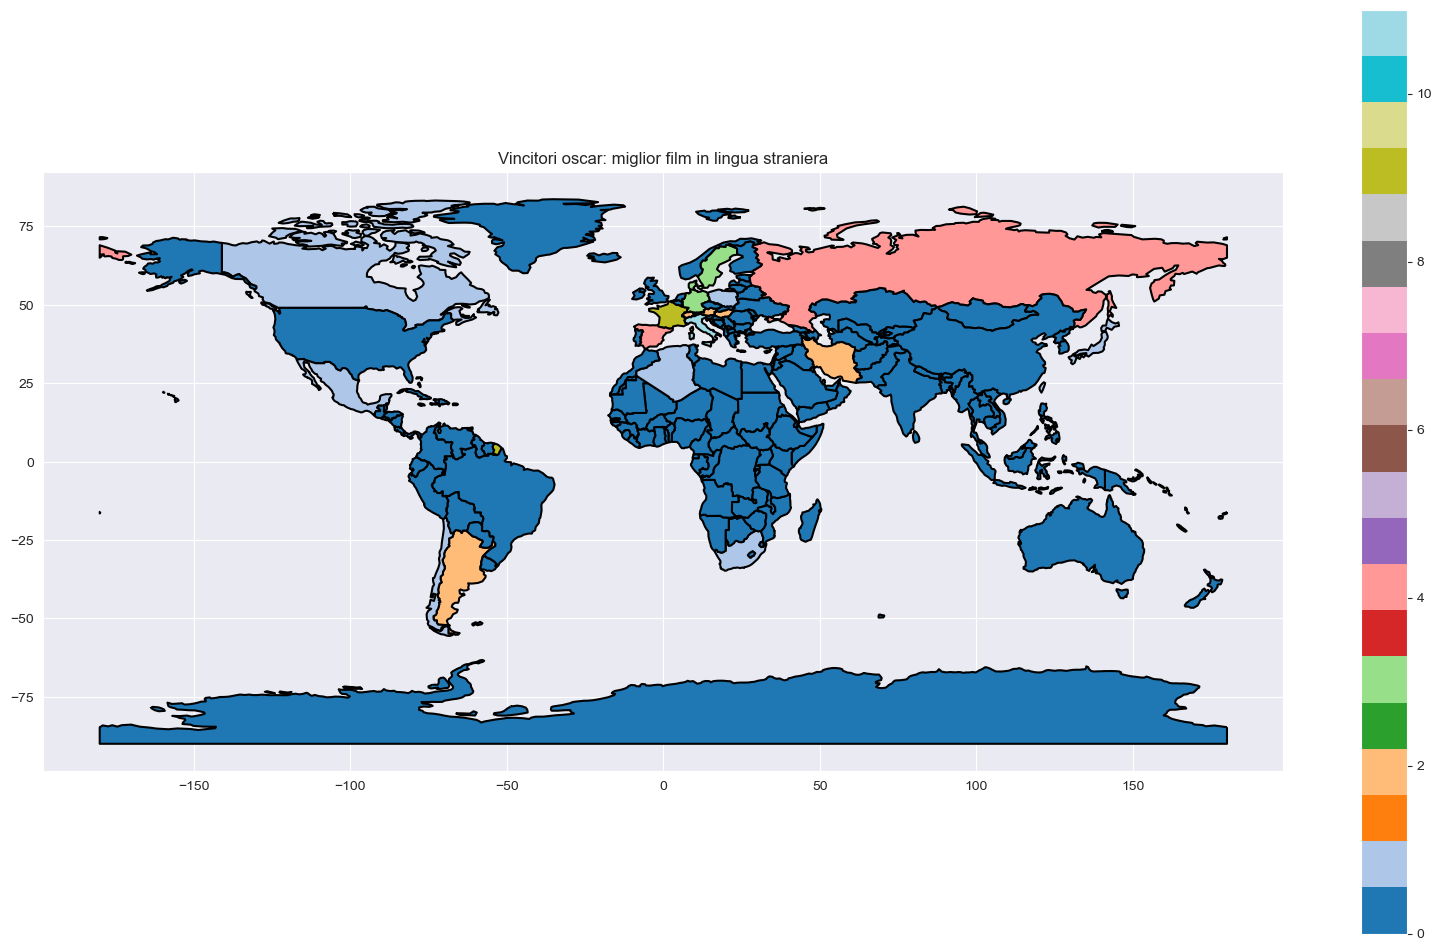

In [22]:
#Rappresento graficamente 
merged = world.merge(conteggi_df,how='left',left_on='NAME',right_on='country')
merged['count']=merged['count'].fillna(0)

fig, ax = plt.subplots(1, 1, figsize=(20, 12))
merged.plot(column='count', ax=ax, legend=True,cmap='tab20',edgecolor='black',linewidth=1.5, figsize=(15,10))
plt.title('Vincitori oscar: miglior film in lingua straniera')
plt.show()

## Chi ha prodotto più film?

In [23]:
movies_per_year_df = movies_df[['id', 'film_date']].copy()

In [26]:
movies_per_year_df.dropna(axis=0,inplace=True)
movies_per_year_df.dtypes

id                    int64
film_date    datetime64[ns]
dtype: object

In [27]:
new_country_df = countries_df.copy()
new_country_df.dropna(axis=0,inplace=True)

In [28]:
movies_per_year_df = pd.merge(movies_per_year_df,new_country_df,on='id',how='left')
movies_per_year_df.head()

,id,film_date,country
0,1000001,2023-01-01,UK
1,1000001,2023-01-01,USA
2,1000002,2019-01-01,South Korea
3,1000003,2022-01-01,USA
4,1000004,1999-01-01,Germany


In [29]:
movies_per_year_df.isnull().sum()

id                0
film_date         0
country      256299
dtype: int64

In [30]:
movies_per_year_df.dropna(axis=0,inplace=True)
movies_per_year_df.isnull().sum()

id           0
film_date    0
country      0
dtype: int64

In [31]:
print(movies_per_year_df.duplicated().sum())

0


In [32]:
movies_per_year_df['country'] = movies_per_year_df['country'].replace('State of Palestine','Palestine')
movies_per_year_df['country'] = movies_per_year_df['country'].replace('USSR','Russia')
movies_per_year_df['country'] = movies_per_year_df['country'].replace('Democratic Republic of Congo','Dem. Rep. Congo')
movies_per_year_df['country'] = movies_per_year_df['country'].replace('Russian Federation','Russia')
movies_per_year_df['country'] = movies_per_year_df['country'].replace('Central African Republic','Central African rep.')
movies_per_year_df['country'] = movies_per_year_df['country'].replace('South Sudan','S. Sudan')
movies_per_year_df['country'] = movies_per_year_df['country'].replace('Bolivarian Republic of Venezuela','Venezuela')
movies_per_year_df['country'] = movies_per_year_df['country'].replace('UK','United Kingdom')
all_countries = movies_per_year_df['country'].unique().tolist()

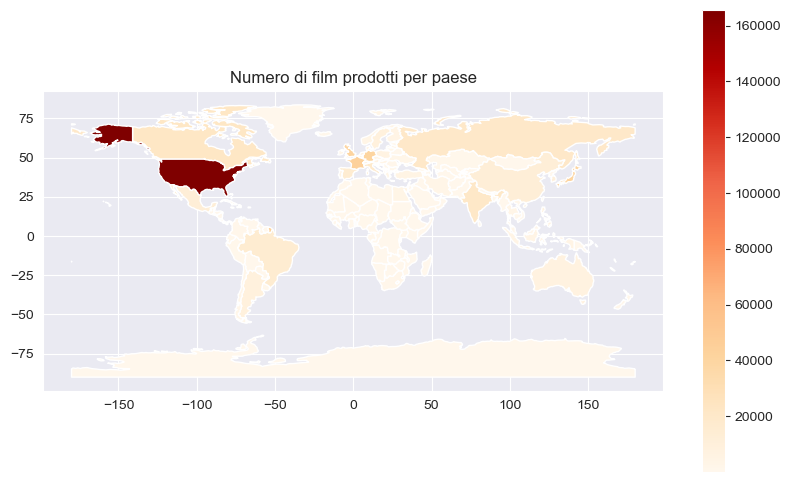

In [34]:
country_count = movies_per_year_df['country'].value_counts().reset_index()
country_count.columns = ['country','film_count']

country_count['country']= country_count['country'].replace('USA', 'United States of America')
merged = world.merge(country_count, left_on='NAME', right_on='country', how='left')
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged.plot(column='film_count', cmap='OrRd', legend=True, ax=ax)
ax.set_title('Numero di film prodotti per paese')
countries_world = world['NAME'].unique().tolist()
set_countries_world = set(countries_world)
set_all_countries= set(all_countries)
countries_not_in_reference = set_all_countries - set_countries_world
countries_not_in_reference = list(countries_not_in_reference)

plt.show()

## Nel tempo come si è evoluta la lunghezza dei film? 

In [83]:
time_df =movies_int_df[['id', 'date', 'minute']].copy()
new_names = {'date':'year','minute': 'length'}
time_df=time_df.rename(columns=new_names)
time_df.dropna(axis=0,inplace=True)
time_df.head(10)

,id,year,length
0,1000001,2023.0,114.0
1,1000002,2019.0,133.0
2,1000003,2022.0,140.0
3,1000004,1999.0,139.0
4,1000005,2016.0,129.0
5,1000006,2023.0,181.0
6,1000007,2014.0,169.0
7,1000008,2019.0,122.0
8,1000009,2021.0,155.0
9,1000010,1994.0,154.0


In [84]:
time_df = time_df[time_df['length']>60 ]
time_df = time_df[time_df['length']<300]
time_df['year']= time_df['year'].astype(int)
average_length = time_df.groupby('year')['length'].mean().reset_index()
average_length.head(10)

,year,length
0,1899,135.000000
1,1900,79.000000
2,1903,120.000000
3,1904,70.000000
4,1906,87.500000
5,1907,155.000000
6,1908,135.500000
7,1910,85.600000
8,1911,87.600000
9,1912,94.153846


In [85]:
average_length = average_length[average_length['year'] < 2025]

In [86]:
fig = px.scatter(
    average_length,
    x="year",
    y="length",
    animation_frame="year",
    title="Evoluzione della lunghezza dei film negli anni",
    labels={'year': 'Anno', 'length': 'Durata (minuti)'},
    range_x=[1899, 2024],
    range_y=[60, 160]
)

# Modifica del tracciato per includere linea e marker
fig.update_traces(mode="lines+markers", marker=dict(size=15, color='blue'))

# Configurazione del layout
fig.update_layout(
    xaxis=dict(title="Anno"),
    yaxis=dict(title="Durata (minuti)"),
    showlegend=False
)
fig.add_trace(
    go.Scatter(
        x=average_length['year'],
        y=average_length['length'],
        mode='lines',
        line=dict(color='gray', width=2),
        showlegend=False
    )
)

fig.show()

## Come vengono maggiormente trasmessi i film, nei vari paesi?

In [88]:
#Rinomino dei paesi
releases_df['country'] = releases_df['country'].replace('Democratic Republic of Congo', 'Dem. Rep. Congo')
releases_df['country'] = releases_df['country'].replace('USSR', 'Russia')
releases_df['country'] = releases_df['country'].replace('UK', 'United Kingdom')
releases_df['country'] = releases_df['country'].replace('USA', 'United States of America')
releases_df['country'] = releases_df['country'].replace('United State of America', 'United States of America')
releases_df['country'] = releases_df['country'].replace('Bolivarian Republic of Venezuela', 'Venezuela')

In [89]:
#Creo dei sottogruppi divisi per paese e ne ritorno la type maggiore per ognuno di essi
type_country_df = releases_df.groupby('country')['type'].agg(pd.Series.mode).reset_index()

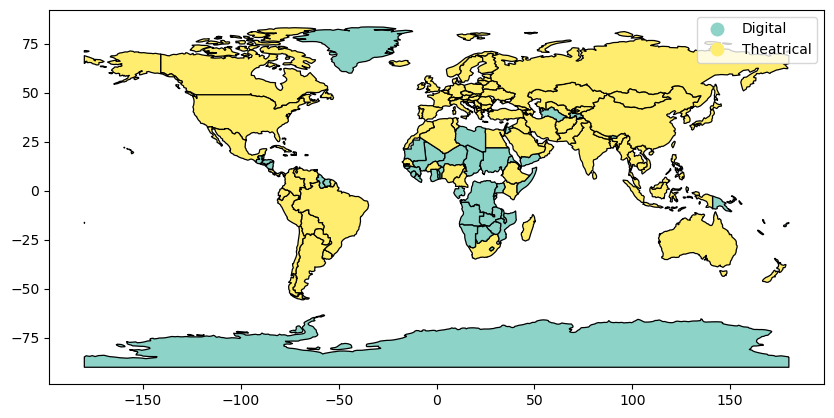

In [90]:
#Rappresento graficamente
merged = world.merge(type_country_df,how='inner',left_on='NAME',right_on='country')

fig, ax = plt.subplots(figsize=(10, 16)) 

merged.plot(ax=ax,  edgecolor='black', linewidth=0.9, column='type', legend=True, cmap='Set3')
plt.show()